### Get wind speed data: read in .grib files downloaded from the ERA5 reanalysis dataset, interpolate to the OOI stations, write to file

In [1]:
import netCDF4 as nc
import datetime
from obspy.clients.fdsn.client import Client
import obspy
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import matplotlib
import numpy as np
matplotlib.rcParams['font.family']=['Arial']
from dateutil.relativedelta import *
import warnings
warnings.filterwarnings('ignore')
import requests
import pickle
import xarray as xr
import glob

#### Wind speed data has to be downloaded manually from ERA5. I download as .grib. These are BIG files, beware!
Downloaded here: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form

In [6]:
files = glob.glob('ERA5_wind_*.grib')
files.sort()

### Locations to interpolate to

In [2]:
hys14_lat = 44.569118
hys14_lon = -125.147903
hysb1_lat =44.509781
hysb1_lon = -125.405296

### Interpolate to HYSB1

In [7]:
hysb1_ws = []
hysb1_ws_times = []
for f in files:
    ds = xr.open_dataset(f,engine='cfgrib',backend_kwargs={'indexpath': ''})
    point = ds.interp(longitude=hysb1_lon, latitude=hysb1_lat)
    hysb1_ws_times.extend(ds['time'].to_numpy())
    ws_u=point['u10'].to_numpy()
    ws_v=point['v10'].to_numpy()
    ws_era = [np.sqrt(ws_u[i]**2 + ws_v[i]**2) for i in range(len(ws_u))]
    hysb1_ws.extend(ws_era)

### Interpolate to HYS14

In [8]:
hys14_ws = []
hys14_ws_times = []
for f in files:
    ds = xr.open_dataset(f,engine='cfgrib',backend_kwargs={'indexpath': ''})
    point = ds.interp(longitude=hys14_lon, latitude=hys14_lat)
    hys14_ws_times.extend(ds['time'].to_numpy())
    ws_u=point['u10'].to_numpy()
    ws_v=point['v10'].to_numpy()
    ws_era = [np.sqrt(ws_u[i]**2 + ws_v[i]**2) for i in range(len(ws_u))]
    hys14_ws.extend(ws_era)

## Plot

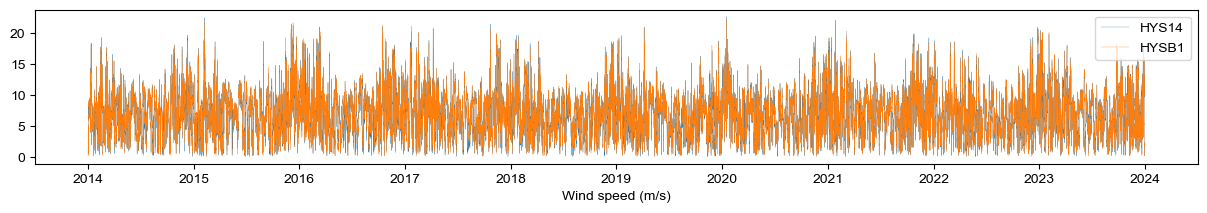

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,2),sharex=True)
ax.plot(hys14_ws_times,hys14_ws,linewidth=0.2,label = 'HYS14')
ax.plot(hysb1_ws_times,hysb1_ws,linewidth=0.2,label = 'HYSB1')
ax.set_xlabel('Wind speed (m/s)')
ax.legend()

## Pickle!

In [21]:
ws_times = hys14_ws_times
ws = hys14_ws
with open('era5_hys14_windspeeds.pickle', 'wb') as handle:
    pickle.dump([ws_times,ws],handle)

In [22]:
ws_times = hysb1_ws_times
ws = hysb1_ws
with open('era5_hysb1_windspeeds.pickle', 'wb') as handle:
    pickle.dump([ws_times,ws],handle)